## CAHPTER5 서포트 벡터 머신
> - SVM은 매우 강력하고 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델이다.
> - SVM은 특히 복잡한 분류 문제에 잘 들어맞으며 작거나 중간 크기의 데이터셋에 적합하다.

![ex_screenshot](./img/99E1F8485B87A3632A.png)
- 왼쪽 그래프에  세 개의 선형분류기에 만들어진 결정 경계가 보이는데 점선으로 나타난 결정 경계를 만든 모델은 클래스를 적절하게 분류하지 못하고 있다. 다른 두 모델은 훈련 세트에 대해 완벽하게 동작하지만 결정 경계가 샘플에 너무 가까워 새로운 샘플에 대해서는 아마 잘 작동하지 못 할 것이다.
- __오른쪽 그래프에 있는 실선은 SVM의 결정 경계이다.__ 이 직선은 두 개의 클래스를 나누고 있을 뿐만 아니라 제일 __가까운 훈련 샘플로부터 가능한 멀리 떨어져 있다.__
- SVM 분류기를 클래스 사이에 가장 폭이 넓은 도로를 찾는 것으로 생각할 수 있다. 그래서 __라지 마진 분류__라고 한다.
- 도로 바깥쪽에 훈련 샘플을 더 추가해도 결정 경계에는 전혀 영향을 미치지 않는다.
- 도로 경계에 위치한 샘플에 의해 전적으로 결정됩니다. 이런 샘플을 서포트 벡터라 한다.
> ※ SVM은 특성의 스케일에 민감하다.※  
> 수직축의 스케일이 수평축의 스케일보다 훨씬 커지면 가장 넓은 도로가 거의 수평에 가깝게 된다. 특성의 스케일을 조정하면 결정 경계가 훨씬 좋아진다.
- 모든 샘플이 도로 바깥쪽에 올바르게 분류되어 있다면 이를 하드 마진 분류라 하는데 이는 두 가지 __문제점__이 있다
> - 1) 데이터가 선형적으로 구분될 수 있어야 제대로 작동한다.
> - 2) 이상치의 위치에 따라 하드 마진을 못 찾을 수 있으며 일반화 되지 않는다.
- 이러한 문제를 피하려면 좀 더 유연한 모델이 필요한데 가능한 도로의 폭을 넓게 유지하는 것과 마진 오류 사이에 적절한 균형을 잡아야 하는데 이를 __소프트 마진 분류__ 라고 한다.
> - C 하이퍼파라미터를 사용해 균형을 조절
> - C 값을 줄이면 도로의 폭이 넙어지지만 마진 오류도 커진다.

In [27]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import os

In [2]:
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
X = iris['data'][:,(2,3)] # 꽃잎 길이, 꽃잎 너비
y = (iris['target']==2).astype(np.float64) # Iris - Virginica인 경우 = 1 아니면 0

In [5]:
svm_clf = Pipeline([("scaler",StandardScaler()), # 스케일 조정
                   ("linear_svc",LinearSVC(C=1,loss="hinge")), # C = 1, loss함수로 hinge
                   ])
svm_clf.fit(X,y) # 모델 훈련

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

In [6]:
svm_clf.predict([[5.5,1.7]]) # 꽃잎 길이: 5.5 , 꽃잎 너비:1.7
# SVC 모델은 probability = True로 매개변수를 지정하면 predict_proba() 메서드를 제공 기본값은 False

array([1.])

 - 다른 방법으로는 SGDclassifier(loss='hinge',alpha=1/(m*c)와 같이  사용하는데 이는 선형 SVM 분류기를 훈련시키기 위해 일반적인 확률적 경사하강법을 적용한다. 데이터셋이 아주 커서 메모리에 적재할 수 없거나, 온라인 학습으로 분류문제를 다룰 때 유용하다.
 - LinearSVC는 규제에 편향을 포함시킨다. 그래서 훈련 세트에서 평균을 빼서 중앙에 맞춰줘야하는데 StandardScaler를 사용하여 데이터 스케일을 맞추는 자동으로 된다.
 - loss = 'hinge'
 - 훈련 샘플보다 특성이 많지 않다면 성능을 높이기 위해 dual 매개변수를 False로 지정해야 한다.

### 5.2 비선형 분류
- 선형적으로 분류할 수 없는 데이터셋이 많다.
>  비선형 데이터셋을 다루는 방법은 다항 특성과 같은 특성을 더 추가하는 것이다.

![ex_screenshot](./img/99E6E0365B880C1121.png)

- 왼쪽 그래프와 같이 특성 한개로 구분하기 힘든경우 오른쪽 그래프 처럼 x2 = x1^2을 통해 선형적으로 구분

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import mglearn

In [8]:
X,y = make_moons(n_samples=100,noise=0.15,random_state=42)

In [9]:
polynomial_svm_clf = Pipeline([("poly_features",PolynomialFeatures(degree=3)), # 다항회귀 차수 = 3
                              ("scaler",StandardScaler()), # LinearSVC를 사용할때 스케일 조정 필요
                              ("svm_clf",LinearSVC(C=10,loss="hinge")) # C = 100, loss = hinge
                              ])
polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))])

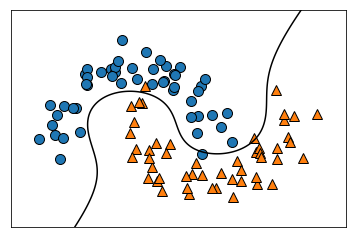

In [10]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
mglearn.plots.plot_2d_separator(polynomial_svm_clf, X) # 2차원 평면
plt.show()

### 5.2.1 다항식 커널
- 낮은 차수의 다항식은 매우 복잡한 데이터셋을 잘 표현하지 못하고 높은 차수의 다항식은 굉장히 많은 특성을 추가하므로 모델을 느리게 만든다.
> 커널 트릭을 통해 실제로는 특성을 추가하지 않으면서 다항식 특성을 많이 추가한 것과 같은 결과를 얻을 수 있다.

In [11]:
from sklearn.svm import SVC

In [12]:
poly_kernel_svm_clf = Pipeline([("scaler",StandardScaler()),
                              ("svm_clf",SVC(kernel="poly",degree=10,coef0=100,C=5))]) 
# 3차 다항식 커널을 사용해 SVM 분류기를 훈련
# 모델이 과대적합이람ㄴ 다항식의 차수를 출여야 한다. 반대로 과소적합이라면 차수를 늘린다.
# coef0은 모델이 높은 차수와 낮은 차수에 얼마나 영향을 받을지 조절
# 적절한 하이퍼파라미터 찾는 일반적인 방법은 그리드 탐색을 이용
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

- 다항식 커널은 차수가 높아질수록 1보다 작은 값과 1보다 큰 값의 차이가 크게 벌어지므로 coef0을 적절한 값으로 지정하면 고차항의 영향을 줄일 수 있다. coef0의 기본값은 0이다.

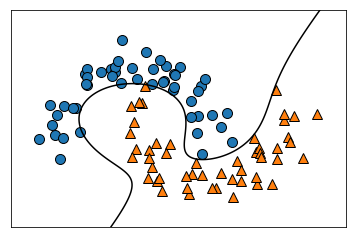

In [13]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
mglearn.plots.plot_2d_separator(poly_kernel_svm_clf, X) # 2차원 평면
plt.show()

### 가우시안 RBF커널
- 유사도 특성 방식으로 추가 특성을 계산하려면 연산 비용이 많이 드는데 특히 훈련 세트가 클 경우 더 그렇다.
> 커널 트릭으로 유사도 특성을 많이 추가하는 것과 같은 비슷한 결과를 실제로 특성을 추가하지 않고 얻을 수 있다.

In [15]:
rbf_kernel_svm_clf = Pipeline([('Scaler',StandardScaler()),
                              ('svm_clf',SVC(kernel='rbf',gamma=5,C = 0.001))])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
     steps=[('Scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

![test](./img/RBF.png)
- gamma를 증가시키면 종 모양 그래프가 좁아져서 각 샘플의 영향 범위가 작아진다.
> 결정 경계가 조금 더 불규칙해지고 각 샘플을 따라 구불구불하게 휘어진다.
- 반대로 작은 gamma 값은 넓은 종 모양 그래프를 만들며 샘플이 영향 범위가 넓어진다. 
> 결정 경계가 덜 불규칙해지고 각 샘플에 따라 부드럽게 휘어진다.
- 결국 하이퍼파라미터 gamma가 규제의 역할을 한다. 
> 모델이 과대적합일 경우엔 감소시켜야 하고 과소적합일 경우엔 증가시켜야한다.
- 여러가지 커널 중 어떤 것을 사용해야 할지는 언제나 선형 커널을 먼저 시도해야한다.(LinearSVC) 특히 훈련세트가 아주 크거나 특성의 수가많을 경우에 그렇다. 훈련세트가 너무 크지 않다면 가우시안 RBF 커널을 ㅣ도해 보면 좋다. 대부분의 경우 이 커널이 잘 들어 맞는다. (시간과 컴퓨팅이 충분하다면)

### SVM 회귀
- 일정한 마진 오류 안에서 두 클래스 간의 도로 폭이 가능한 한 최대가 되도록 하는 대신, SVM 회귀는 제한된 마진 오류(즉, 도로 밖의 샘플) 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습한다.
- 도로의 폭은 하이퍼파라미터 ε으로 조절한다.

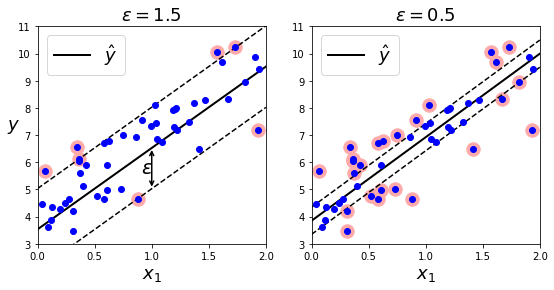

In [34]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])


def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

# 왼쪽 그래프는 마진을 크게 1.5 / 오른쪽 그래프는 마진을 작게 0.5

- 마진 안에서는 훈련 샘플이 추가되어도 모델의 예측에는 영향이 없다. 그래서 이 모델은 ε에 민감하지 않다고 말한다.

In [35]:
from sklearn.svm import LinearSVR # 선형 SVM 회귀

In [36]:
svm_reg = LinearSVR(epsilon=1.5) # ε = 1.5
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

![test1](./img/SVM.png)
- 2차방정식 형태의 훈련 세트에 2차 다항 커널을 사용한 SVM 회귀
- 왼쪽 그래프는 규제가 거의 없고 오른쪽 그래프느 규제가 훨씬 많다.

In [37]:
# SVR은 SVC의 회귀 버전이고 LinearSVR은 LinearSVC의 회귀 버전이다.
# LinearSVR은 필요한 시간이 훈련 세트의 크기에 비례해서 선형적으로 늘어나지만 SVR은 훈련 세트가 커지면 훨씬 느려짐
from sklearn.svm import SVR

In [38]:
svm_poly_reg = SVR(kernel='poly',degree=2,C=100,epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)